# **Youtube Trending Video Analysis** (US)

## Trending Youtube Video
Trending helps viewers see what’s happening on YouTube and in the world. Trending aims to surface videos and shorts that a wide range of viewers would find interesting. Some trends are predictable, like a new song from a popular artist or a new movie trailer. Others are surprising, like a viral video. Trending isn't personalized and displays the same list of trending videos to all viewers in the same country, which is why you may see videos in Trending that aren’t in the same language as your browser. However, in India, Trending displays a list of results for each of the 9 most common Indic languages. In certain countries, popular shorts may be highlighted on a shelf within the trending page. 

## What determines if a video is ranked on Trending? (but not limited to)
* View count
* How quickly the video is generating views
* The age of the video

Source : https://support.google.com/youtube/answer/7239739?hl=en

## **What Makes Youtube Video Trending?** (US)
### 1. How Many Views Do YouTubers Need to Make It Trending?
### 2. Do Engagement Ratio Matter to Get Trending?
### 3. When is the Best Time to Get More Views on Youtube?
### 4. How Quickly Can a Video Get Trending?
### 5. Which Category is More Likely to Get Trending?

## Data Preprocessing and Data Cleaning

**IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json

**READ CSV**

In [2]:
US_Videos=pd.read_csv('USvideos.csv')
US_Videos['trending_date']=US_Videos['trending_date']+'T23:59:59.00Z' # Asumsi: Trending List Terakhir di Hari Tersebut
US_Videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11T23:59:59.00Z,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11T23:59:59.00Z,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11T23:59:59.00Z,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11T23:59:59.00Z,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11T23:59:59.00Z,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
US_Videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [4]:
# Mengubah Data Type Kolom 'trending_date' dan 'publish_time' ke Bentuk Data Type datetime
US_Videos['trending_date']=pd.to_datetime(US_Videos['trending_date'],format='%y.%d.%mT%H:%M:%S.%fZ')
US_Videos['publish_time']=pd.to_datetime(US_Videos['publish_time'],format='%Y-%m-%dT%H:%M:%S.%fZ')

**US_VIDEOS DATA FRAME INFO**

In [5]:
US_Videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  datetime64[ns]
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

**READ JSON**

In [6]:
with open('US_category_id.json','r') as f:
    data = json.loads(f.read())
US_Category=pd.json_normalize(data, record_path=['items'])
US_Category

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [7]:
US_Category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   kind                32 non-null     object
 1   etag                32 non-null     object
 2   id                  32 non-null     object
 3   snippet.channelId   32 non-null     object
 4   snippet.title       32 non-null     object
 5   snippet.assignable  32 non-null     bool  
dtypes: bool(1), object(5)
memory usage: 1.4+ KB


In [8]:
# Mengubah Data Type Kolom 'id' ke Bentuk Data Type integer
US_Category.rename(columns={'id':'category_id'},inplace=True)
US_Category['category_id']=US_Category['category_id'].astype('int64')

**US_CATEGORY DATA FRAME INFO**

In [9]:
US_Category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   kind                32 non-null     object
 1   etag                32 non-null     object
 2   category_id         32 non-null     int64 
 3   snippet.channelId   32 non-null     object
 4   snippet.title       32 non-null     object
 5   snippet.assignable  32 non-null     bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 1.4+ KB


**MERGE US_VIDEOS AND US_CATEGORY DATA FRAME TO DATA FRAME 1**

In [10]:
# Memasukan Kolom 'category' dari Data Frame US_Category
df1=pd.merge(US_Videos,US_Category[['category_id','snippet.title']], on=['category_id'])
df1.rename(columns={'snippet.title':'category'},inplace=True)
df1.drop(columns=['category_id'],inplace=True)
df1.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,2017-11-14 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,2017-11-14 23:59:59,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,2017-11-14 23:59:59,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,2017-11-14 23:59:59,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,2017-11-14 23:59:59,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


**ADD NEW COLUMN TO DATA FRAME 1**

**1. ENGAGEMENT RATIO**<br>
Interaksi yang dilakukan penonton penonton dalam sebuah video.<br>
Video Engagement Ratio = (Interactions)/Video Views<br>
Source : https://www.socialstatus.io/insights/social-media-benchmarks/youtube-engagement-rate-benchmark/

In [11]:
df1['engagement_ratio']=((df1['likes']+df1['dislikes']+df1['comment_count'])/df1['views'])*100
df1.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,engagement_ratio
0,2kyS6SvSYSE,2017-11-14 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,10.215080
1,0mlNzVSJrT0,2017-11-14 23:59:59,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,3.235455
2,STI2fI7sKMo,2017-11-14 23:59:59,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,2.217079
3,KODzih-pYlU,2017-11-14 23:59:59,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,4.020562
4,8mhTWqWlQzU,2017-11-14 23:59:59,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,4.484611


**2. TRENDING COUNT**<br>
Berapakali sebuah video masuk kedalam Trending Youtube pada rentang waktu 14 November 2017 hingga 14 Juni 2017.

In [12]:
trending_count=pd.DataFrame(df1['video_id'].value_counts()).reset_index()
trending_count.rename(columns={'index':'video_id','video_id':'trending_count'},inplace=True)
trending_count.head()

,video_id,trending_count
0,j4KvrAUjn6c,30
1,iILJvqrAQ_w,29
2,t4pRQ0jn23Q,29
3,MAjY8mCTXWk,29
4,NBSAQenU2Bk,29


In [13]:
# Menggabungkan Data Frame trending_count ke Data Frame 1
df1=pd.merge(df1,trending_count,on='video_id')
df1.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,engagement_ratio,trending_count
0,2kyS6SvSYSE,2017-11-14 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,10.215080,7
1,2kyS6SvSYSE,2017-11-15 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.458948,7
2,2kyS6SvSYSE,2017-11-16 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.165246,7
3,2kyS6SvSYSE,2017-11-17 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.091428,7
4,2kyS6SvSYSE,2017-11-18 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.022593,7


**3. TRENDING TIME**<br>
Menunjukan nama hari dan bulan sebuah video masuk kedalam Trending Youtube.

In [14]:
# Ekstraksi
trending_dt=df1['trending_date'].dt

In [15]:
df1['trending_day_name']=trending_dt.day_name()# Trending by Day Name
df1['trending_month_name']=trending_dt.month_name() # Trending by Month Name
df1.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,engagement_ratio,trending_count,trending_day_name,trending_month_name
0,2kyS6SvSYSE,2017-11-14 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,10.215080,7,Tuesday,November
1,2kyS6SvSYSE,2017-11-15 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.458948,7,Wednesday,November
2,2kyS6SvSYSE,2017-11-16 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.165246,7,Thursday,November
3,2kyS6SvSYSE,2017-11-17 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.091428,7,Friday,November
4,2kyS6SvSYSE,2017-11-18 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.022593,7,Saturday,November


**4. VIEWS IN MILLION**<br>
Menunjukan jumlah penonton dalam satuan juta.

In [16]:
df1['views_million']=round(df1['views']/1000000,3)
df1.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,comments_disabled,ratings_disabled,video_error_or_removed,description,category,engagement_ratio,trending_count,trending_day_name,trending_month_name,views_million
0,2kyS6SvSYSE,2017-11-14 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,10.215080,7,Tuesday,November,0.748
1,2kyS6SvSYSE,2017-11-15 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2188590,88099,7150,24225,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.458948,7,Wednesday,November,2.189
2,2kyS6SvSYSE,2017-11-16 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2325233,91111,7543,21450,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.165246,7,Thursday,November,2.325
3,2kyS6SvSYSE,2017-11-17 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2400741,92831,7687,21714,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.091428,7,Friday,November,2.401
4,2kyS6SvSYSE,2017-11-18 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2468267,94303,7802,21866,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.022593,7,Saturday,November,2.468


**5. VIEWS DIFFERENCE**<br>
Menunjukan perbedaan penonton sebuah video dari hari ke hari.

In [17]:
df1.sort_values(by='trending_date')
df1['views_diff']=df1.groupby(['video_id'])['views_million'].diff().fillna(0)
df1.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,category,engagement_ratio,trending_count,trending_day_name,trending_month_name,views_million,views_diff
0,2kyS6SvSYSE,2017-11-14 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,10.215080,7,Tuesday,November,0.748,0.000
1,2kyS6SvSYSE,2017-11-15 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2188590,88099,7150,24225,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.458948,7,Wednesday,November,2.189,1.441
2,2kyS6SvSYSE,2017-11-16 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2325233,91111,7543,21450,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.165246,7,Thursday,November,2.325,0.136
3,2kyS6SvSYSE,2017-11-17 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2400741,92831,7687,21714,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.091428,7,Friday,November,2.401,0.076
4,2kyS6SvSYSE,2017-11-18 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,2468267,94303,7802,21866,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,5.022593,7,Saturday,November,2.468,0.067


**MISSING VALUE DATA FRAME 1**

In [18]:
df1.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category                    0
engagement_ratio            0
trending_count              0
trending_day_name           0
trending_month_name         0
views_million               0
views_diff                  0
dtype: int64

In [19]:
# Mengisi Missing Value Kolom 'description' dengan ''
df1['description']=df1['description'].fillna('')
df1.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category                  0
engagement_ratio          0
trending_count            0
trending_day_name         0
trending_month_name       0
views_million             0
views_diff                0
dtype: int64

**DATA DUPLICATE**

In [20]:
df1.duplicated().sum()

23

In [21]:
# Menghapus Data Duplikat
df1.drop_duplicates(inplace=True)
df1.duplicated().sum() 

0

**DATA FRAME 1 INFO**

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40926 entries, 0 to 40948
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40926 non-null  object        
 1   trending_date           40926 non-null  datetime64[ns]
 2   title                   40926 non-null  object        
 3   channel_title           40926 non-null  object        
 4   publish_time            40926 non-null  datetime64[ns]
 5   tags                    40926 non-null  object        
 6   views                   40926 non-null  int64         
 7   likes                   40926 non-null  int64         
 8   dislikes                40926 non-null  int64         
 9   comment_count           40926 non-null  int64         
 10  thumbnail_link          40926 non-null  object        
 11  comments_disabled       40926 non-null  bool          
 12  ratings_disabled        40926 non-null  bool  

In [23]:
df1.groupby('trending_date').count()['title'] 

trending_date
2017-11-14 23:59:59    200
2017-11-15 23:59:59    200
2017-11-16 23:59:59    200
2017-11-17 23:59:59    200
2017-11-18 23:59:59    200
                      ... 
2018-06-10 23:59:59    200
2018-06-11 23:59:59    200
2018-06-12 23:59:59    200
2018-06-13 23:59:59    200
2018-06-14 23:59:59    200
Name: title, Length: 205, dtype: int64

Data Frame 1 merupakan Data yang Menampilkan sekitar 200 Video Trending Youtube setiap Harinya pada Rentang Waktu 14 November 2017 hingga 14 Juni 2017.

**CREATE DATA FRAME 2**

In [24]:
df1['video_id'].nunique()
# Jumlah Video yang termasuk Kedalam Video Trending Youtube pada Rentang Waktu 14 November 2017 hingga 14 Juni 2017.

6351

In [25]:
# Memisahkan Video Berdasarkan Video yang termasuk Kedalam Video Trending Youtube pada Rentang Waktu 14 November 2017 hingga 14 Juni 2017.
video_distinct=df1.groupby(['video_id']).agg({'trending_date':['max','min'],
                                                 'publish_time':'min'})
# Berdasarkan Kondisi Kolom pada Waktu Trending Terakhir dan Publish Pertama
video_distinct.columns = video_distinct.columns.droplevel(0)
video_distinct.reset_index(inplace=True)
video_distinct.columns=['video_id','trending_date','first_trending_date','first_publish_time']
video_distinct.head()

,video_id,trending_date,first_trending_date,first_publish_time
0,-0CMnp02rNY,2018-06-11 23:59:59,2018-06-06 23:59:59,2018-06-04 13:00:00
1,-0NYY8cqdiQ,2018-02-01 23:59:59,2018-02-01 23:59:59,2018-01-29 14:00:39
2,-1Hm41N0dUs,2018-05-01 23:59:59,2018-04-29 23:59:59,2018-04-27 07:30:02
3,-1yT-K3c6YI,2017-12-02 23:59:59,2017-11-29 23:59:59,2017-11-28 18:30:43
4,-2RVw2_QyxQ,2017-11-16 23:59:59,2017-11-14 23:59:59,2017-11-12 02:39:01


In [26]:
# Membuat Data Frame 2 Berdasarkan Video yang termasuk Kedalam Video Trending Youtube pada Rentang Waktu 14 November 2017 hingga 14 Juni 2017.
df2=pd.merge(video_distinct,df1,on=['video_id','trending_date'])
df2.drop(columns=['publish_time'],inplace=True)# Sudah Diwakilkan Kolom 'first_trending_date'
df2.head()

,video_id,trending_date,first_trending_date,first_publish_time,title,channel_title,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,category,engagement_ratio,trending_count,trending_day_name,trending_month_name,views_million,views_diff
0,-0CMnp02rNY,2018-06-11 23:59:59,2018-06-06 23:59:59,2018-06-04 13:00:00,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,"ellen|""ellen degeneres""|""the ellen show""|""elle...",800359,9773,332,...,False,False,Ocean's 8 star Mindy Kaling dished on bringing...,Entertainment,1.315410,6,Monday,June,0.800,0.007
1,-0NYY8cqdiQ,2018-02-01 23:59:59,2018-02-01 23:59:59,2018-01-29 14:00:39,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,"megan mullally|""megan""|""mullally""|""will and gr...",563746,4429,54,...,False,False,Ellen and Megan Mullally have known each other...,Entertainment,0.811890,1,Thursday,February,0.564,0.000
2,-1Hm41N0dUs,2018-05-01 23:59:59,2018-04-29 23:59:59,2018-04-27 07:30:02,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",2058516,41248,580,...,False,False,"Benedict Cumberbatch, Don Cheadle, Elizabeth O...",Comedy,2.104040,3,Tuesday,May,2.059,0.177
3,-1yT-K3c6YI,2017-12-02 23:59:59,2017-11-29 23:59:59,2017-11-28 18:30:43,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",231341,7734,212,...,False,False,Check out the video we did on the Merrell Twin...,People & Blogs,3.800450,4,Saturday,December,0.231,0.013
4,-2RVw2_QyxQ,2017-11-16 23:59:59,2017-11-14 23:59:59,2017-11-12 02:39:01,2017 Champions Showdown: Day 3,Saint Louis Chess Club,"Chess|""Saint Louis""|""Club""",71089,460,27,...,False,False,The Saint Louis Chess Club hosts a series of f...,Education,0.713191,3,Thursday,November,0.071,0.001


**ADD NEW COLUMN TO DATA FRAME 2**

**1. VIDEO AGE WHEN GET FIRST TRENDING** (DAY)

In [27]:
df2['trending_video_age']=df2['first_trending_date']-df2['first_publish_time']
df2['trending_video_age']=df2['trending_video_age'].dt.days
df2.head()

,video_id,trending_date,first_trending_date,first_publish_time,title,channel_title,tags,views,likes,dislikes,...,video_error_or_removed,description,category,engagement_ratio,trending_count,trending_day_name,trending_month_name,views_million,views_diff,trending_video_age
0,-0CMnp02rNY,2018-06-11 23:59:59,2018-06-06 23:59:59,2018-06-04 13:00:00,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,"ellen|""ellen degeneres""|""the ellen show""|""elle...",800359,9773,332,...,False,Ocean's 8 star Mindy Kaling dished on bringing...,Entertainment,1.315410,6,Monday,June,0.800,0.007,2
1,-0NYY8cqdiQ,2018-02-01 23:59:59,2018-02-01 23:59:59,2018-01-29 14:00:39,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,"megan mullally|""megan""|""mullally""|""will and gr...",563746,4429,54,...,False,Ellen and Megan Mullally have known each other...,Entertainment,0.811890,1,Thursday,February,0.564,0.000,3
2,-1Hm41N0dUs,2018-05-01 23:59:59,2018-04-29 23:59:59,2018-04-27 07:30:02,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",2058516,41248,580,...,False,"Benedict Cumberbatch, Don Cheadle, Elizabeth O...",Comedy,2.104040,3,Tuesday,May,2.059,0.177,2
3,-1yT-K3c6YI,2017-12-02 23:59:59,2017-11-29 23:59:59,2017-11-28 18:30:43,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",231341,7734,212,...,False,Check out the video we did on the Merrell Twin...,People & Blogs,3.800450,4,Saturday,December,0.231,0.013,1
4,-2RVw2_QyxQ,2017-11-16 23:59:59,2017-11-14 23:59:59,2017-11-12 02:39:01,2017 Champions Showdown: Day 3,Saint Louis Chess Club,"Chess|""Saint Louis""|""Club""",71089,460,27,...,False,The Saint Louis Chess Club hosts a series of f...,Education,0.713191,3,Thursday,November,0.071,0.001,2


**DATA FRAME 2 INFO**

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6353 entries, 0 to 6352
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                6353 non-null   object        
 1   trending_date           6353 non-null   datetime64[ns]
 2   first_trending_date     6353 non-null   datetime64[ns]
 3   first_publish_time      6353 non-null   datetime64[ns]
 4   title                   6353 non-null   object        
 5   channel_title           6353 non-null   object        
 6   tags                    6353 non-null   object        
 7   views                   6353 non-null   int64         
 8   likes                   6353 non-null   int64         
 9   dislikes                6353 non-null   int64         
 10  comment_count           6353 non-null   int64         
 11  thumbnail_link          6353 non-null   object        
 12  comments_disabled       6353 non-null   bool    

Data Frame 2 merupakan Data yang Menampilkan Video yang Masuk Kedalam Trending Youtube pada Rentang Waktu 14 November 2017 hingga 14 Juni 2017.

## Data Analytics

df1 : Data yang Menampilkan sekitar 200 Video Trending Youtube setiap Harinya pada Rentang Waktu 14 November 2017 hingga 14 Juni 2017.<br>
df2 : Data yang Menampilkan Video yang Masuk Kedalam Trending Youtube pada Rentang Waktu 14 November 2017 hingga 14 Juni 2017.

### 1. How Many Views Do YouTubers Need to Make It Trending?
Melihat jumlah penonton sebuah video pada saat video tersebut pertama kali masuk trending.

In [30]:
# Membuat Data Frame untuk Mengelompokan Video Berdasarkan Pertama Kali Masuk Trending Youtube
first_trending=df2[['video_id','first_trending_date']]
first_trending.rename(columns={'first_trending_date':'trending_date'},inplace=True)

C:\Users\Dhafin\AppData\Local\Temp\ipykernel_11988\2121587649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_trending.rename(columns={'first_trending_date':'trending_date'},inplace=True)


In [31]:
first_trending=pd.merge(first_trending,df1,on=['video_id','trending_date'])
first_trending.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,category,engagement_ratio,trending_count,trending_day_name,trending_month_name,views_million,views_diff
0,-0CMnp02rNY,2018-06-06 23:59:59,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,2018-06-04 13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",475965,6531,172,271,...,False,False,Ocean's 8 star Mindy Kaling dished on bringing...,Entertainment,1.465234,6,Wednesday,June,0.476,0.0
1,-0NYY8cqdiQ,2018-02-01 23:59:59,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,2018-01-29 14:00:39,"megan mullally|""megan""|""mullally""|""will and gr...",563746,4429,54,94,...,False,False,Ellen and Megan Mullally have known each other...,Entertainment,0.811890,1,Thursday,February,0.564,0.0
2,-1Hm41N0dUs,2018-04-29 23:59:59,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,2018-04-27 07:30:02,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",1566807,32752,393,1490,...,False,False,"Benedict Cumberbatch, Don Cheadle, Elizabeth O...",Comedy,2.210547,3,Sunday,April,1.567,0.0
3,-1yT-K3c6YI,2017-11-29 23:59:59,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,2017-11-28 18:30:43,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",129360,5214,108,516,...,False,False,Check out the video we did on the Merrell Twin...,People & Blogs,4.512987,4,Wednesday,November,0.129,0.0
4,-2RVw2_QyxQ,2017-11-14 23:59:59,2017 Champions Showdown: Day 3,Saint Louis Chess Club,2017-11-12 02:39:01,"Chess|""Saint Louis""|""Club""",67429,438,23,23,...,False,False,The Saint Louis Chess Club hosts a series of f...,Education,0.717792,3,Tuesday,November,0.067,0.0


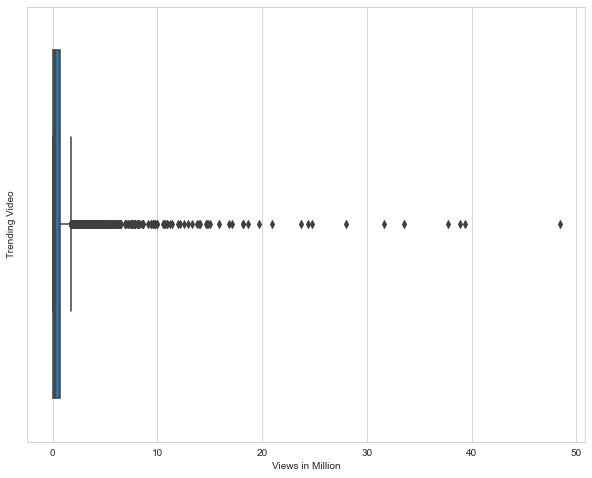

In [32]:
# Melihat Sebaran Data Jumlah Penonton
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.boxplot(data=first_trending,x='views_million')
plt.xlabel('Views in Million')
plt.ylabel('Trending Video')
plt.savefig('1.png')
plt.show()

#### INSIGHT
Histogram tersebut menunjukan jumlah penonton sebuah video saat pertama kali masuk kedalam Trending berada pada rentang kurang dari 1 juta penonton hingga diatas 40 juta penonton dengan rentang IQR pada jumlah penonton dibawah 1 juta penonton.

In [33]:
# Infotable
first_trending['views_million'].describe()

count    6354.000000
mean        0.759913
std         1.931714
min         0.001000
25%         0.084000
50%         0.271000
75%         0.753750
max        48.432000
Name: views_million, dtype: float64

#### INSIGHT
75% video saat pertama kali masuk kedalam Trending memiliki 759.913 penonton.

#### ANALYTICS
* Video yang masuk kedalam trending memiliki jumlah penonton pada rentang kurang dari 1000 penonton hingga lebih dari 48 juta penonton saat pertama kali masuk trending dengan sekitar 75% dari video memiliki jumlah penonton kurang dari 753.750 penonton saat pertama kali masuk trending. Dapat diartikan bahwa jumlah video saat pertama kali masuk trending sebagian berada direntang ratusan ribu atau dibawah 1 juta. Hal tersebut dapat disebabkan oleh adanya faktor lain yang mempengaruhi video dengan jumlah penonton dibawah 1 juta masuk kedalam trending.

### 2. Do Engagement Ratio Matter to Get Trending?
Melihat apakah engagement ratio perlu diperhatikan sebuah video untuk masuk kedalam trending.

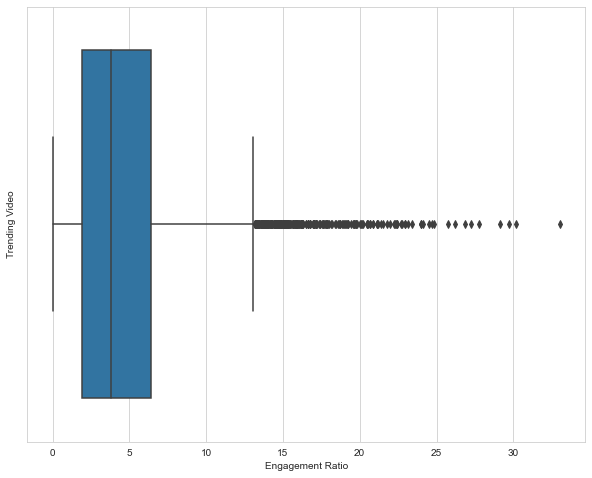

In [110]:
# Melihat Sebaran Data Engagement Ratio
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.boxplot(data=first_trending,x='engagement_ratio')
plt.xlabel('Engagement Ratio')
plt.ylabel('Trending Video')
plt.savefig('2.png')
plt.show()

#### INSIGHT
Histogram menunjukan engagement ratio sebuah video saat pertama kali masuk kedalam Trending berada pada rentang lebih dari 0% hingga diatas 30%.

In [111]:
# Infotable
first_trending['engagement_ratio'].describe()

count    6354.000000
mean        4.764380
std         3.898454
min         0.000000
25%         1.924746
50%         3.801888
75%         6.406011
max        33.025531
Name: engagement_ratio, dtype: float64

#### INSIGHT
75% video saat pertama kali masuk kedalam Trending memiliki *engagement ratio* dibawah 6.4%.

In [136]:
first_trending[first_trending['engagement_ratio']==0].groupby('comments_disabled')[['video_id']].count()# melihat kondisi 'comments_disabled' video dengan 'engagement_ratio' sama dengan 0

,video_id
comments_disabled,
False,2
True,15


In [137]:
first_trending[first_trending['engagement_ratio']==0].groupby('ratings_disabled')[['video_id']].count()# melihat kondisi 'ratings_disabled' video dengan 'engagement_ratio' sama dengan 0

,video_id
ratings_disabled,
False,1
True,16


#### INSIGHT
Kedua table tersebut menunjukan kondisi 'comments_disabled' dan 'ratings_disabled' video dengan 'engagement_ratio' sama dengan 0%. Video dengan 'engagement_ratio' sama dengan 0% lebih banyak disebabkan oleh dinonaktifkannya komentar dan rating pada video.

**Apakah Engagement Ratio mempengaruhi video dibawah 1 juta views masuk kedalam trending?**

In [140]:
# Mengelompokan Berdasarkan Jumlah diatas 1 Juta dan dibawah 1 Juta Penonton
first_trending['views_group']=first_trending['views_million'].apply(lambda x: '> 1 Million Views' if x>=1 else '< 1 Million Views')

In [157]:
# Melihat Jumlah Video dibawah dan diatas 1 juta
first_trending['views_group'].value_counts()

< 1 Million Views    5188
> 1 Million Views    1166
Name: views_group, dtype: int64

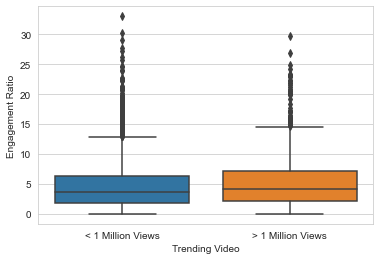

In [153]:
# Melihat Sebaran Data
sns.boxplot(x='views_group',y='engagement_ratio', data=first_trending)
plt.ylabel('Engagement Ratio')
plt.xlabel('Trending Video')
plt.savefig('2.png')
plt.show()

#### INSIGHT
Boxplot tersebut menunjukan sebaran data kelompok video diatas 1 juta dan dibawah 1 juta penonton. Sebaran data menunjukan data tidak terdistribusi tidak normal.

In [143]:
# Melihat Median 'engagement_ratio' data kelompok video diatas 1 juta dan dibawah 1 juta penonton
engagement=first_trending.groupby('views_group').median()[['engagement_ratio']]
engagement.reset_index(inplace=True)
engagement

,views_group,engagement_ratio
0,< 1 Million Views,3.727021
1,> 1 Million Views,4.171771


**Hypotesis Testing**<br>
H0 : Median video dengan jumlah *engagement ratio* dibawah 1 juta = Median video dengan jumlah *engagement ratio* diatas 1 juta.<br>
Ha : Median video dengan jumlah *engagement ratio* dibawah 1 juta < Median video dengan jumlah *engagement ratio* diatas 1 juta.

In [144]:
# Hypotesis Testing
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(first_trending[first_trending['views_group']=='< 1 Million Views']['engagement_ratio'],
                           first_trending[first_trending['views_group']=='> 1 Million Views']['engagement_ratio'],
                           alternative='less'))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 2771839.0
P-Value: 3.988428595005532e-06


**Conclusion**<br>
P-Value < 0.05, artinya cukup bukti untuk menolak H0.

#### INSIGHT
Uji hipotesis menunjukan cukup bukti untuk menolak H0 yang artinya Ha dapat diterima atau median video dengan *engagement ratio* dibawah 1 juta lebih kecil dibandingkan median video dengan jumlah *engagement ratio* diatas 1 juta.

#### ANALYTICS
* Video yang masuk kedalam trending memiliki engagement ratio pada rentang kurang dari  0% hingga lebih dari 33% saat pertama kali masuk trending dengan sekitar 75% dari video memiliki engagement ratio kurang dari 6.4% saat pertama kali masuk trending. Hal tersebut menunjukan bahwa sebagian besar video memiliki lebih dari 0% sebelum masuk trending(dengan catatan video tidak menonaktifkan kolom komentar dan rating), maka dapat dikatakan bahwa Engagement Ratio menjadi faktor yang perlu diperhatikan untuk masuk kedalam trending. 
* Walaupun menjadi faktor yang perlu diperhatikan, engagement ratio secara signifikan tidak menjadi faktor yang mempengaruhi fenomena lebih banyaknya video dengan jumlah penonton dibawah 1 juta yang masuk kedalam trending dibandingkan video dengan jumlah penonton diatas 1 juta. Hal tersebut dapat dipengaruhi oleh faktor lain.

### 3. When is the Best Time to Get More Views on Youtube?
Jumlah penonton menjadi salah satu hal yang penting untuk itu perlu melihat waktu dimana sebuah video dapat mendapatkan penambahan penonton yang banyak. Penambahan jumlah penonton ini dapat diartikan sebagai banyak jumlah penonton di YouTube pada waktu tersebut dengan asumsi trending menggambarkan keadaan YouTube.

In [54]:
#Infotable
df1['views_diff'].describe()

count    40926.000000
mean         0.186806
std          0.798750
min        -10.746000
25%          0.003000
50%          0.022000
75%          0.097000
max         52.302000
Name: views_diff, dtype: float64

#### INSIGHT
75% penambahan penonton berada dibawah 97.000 penonton.

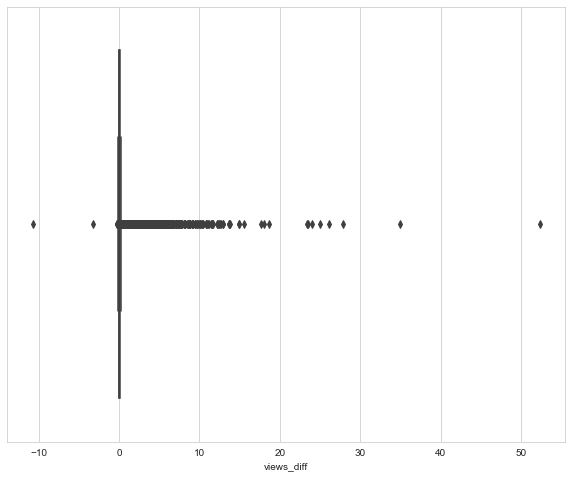

In [55]:
# Melihat Distribusi Data Kolom 'views_diff'
plt.figure(figsize=(10,8))
sns.boxplot(data=df1, x='views_diff')
plt.show()

#### INSIGHT
Boxplot menunjukan bahwa distribusi data tidak normal.

In [98]:
# Melihat Penambahan Penonton Berdasarkan Hari
day_views=df1[df1['trending_count']>1].groupby(['trending_day_name']).median()[['views_diff']]
day_views.reset_index(inplace=True)
day_views

,trending_day_name,views_diff
0,Friday,0.019
1,Monday,0.024
2,Saturday,0.021
3,Sunday,0.027
4,Thursday,0.022
5,Tuesday,0.023
6,Wednesday,0.024


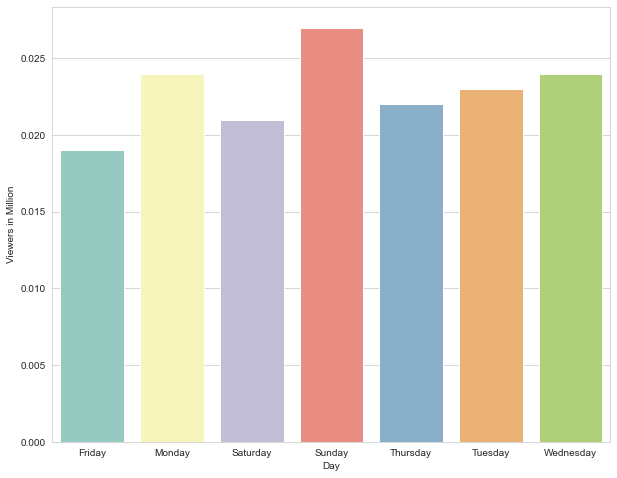

In [99]:
# Data Visualization
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.barplot(data=day_views, x='trending_day_name',y='views_diff',palette='Set3')
plt.title('')
plt.xlabel('Day')
plt.ylabel('Viewers in Million')
plt.savefig('4(1).png')
plt.show()

#### INSIGHT
Barplot tersebut menunjukan penambahan penonton. Penambahan penonton paling banyak terjadi pada hari Minggu dan penambahan penonton terendah terjadi pada hari Jumat.

In [58]:
# Melihat Rata-Rata Penambahan Penonton Kategori Video Berdasarkan Hari
category_views_day=df1.pivot_table(values='views_diff',index='category',columns='trending_day_name',aggfunc='median')
category_views_day

trending_day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
category,,,,,,,
Autos & Vehicles,0.0060,0.0050,0.0155,0.0070,0.012,0.0110,0.0220
Comedy,0.0190,0.0270,0.0280,0.0300,0.019,0.0260,0.0225
Education,0.0095,0.0100,0.0120,0.0140,0.013,0.0095,0.0130
Entertainment,0.0180,0.0220,0.0210,0.0250,0.020,0.0210,0.0230
Film & Animation,0.0330,0.0365,0.0500,0.0450,0.017,0.0310,0.0270
Gaming,0.0250,0.0270,0.0330,0.0380,0.027,0.0220,0.0350
Howto & Style,0.0100,0.0190,0.0130,0.0150,0.012,0.0140,0.0130
Music,0.1020,0.1120,0.0800,0.1490,0.116,0.0980,0.1070
News & Politics,0.0040,0.0030,0.0030,0.0050,0.004,0.0020,0.0050


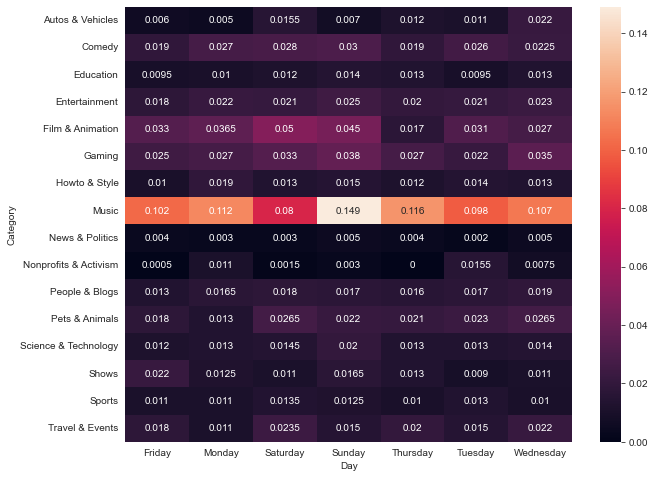

In [59]:
# Data Visualization
plt.figure(figsize=(10,8))
sns.heatmap(category_views_day, annot=True,fmt='g')
plt.xlabel('Day')
plt.ylabel('Category')
plt.savefig('4(2).png')
plt.show()

#### INSIGHT
Heatmap tersebut menunjukan rata-rata penambahan penonton kategori video berdasarkan hari. Kategori Video Music memiliki rata-rata penambahan penonton yang besar setiap harinya, terutama pada hari Minggu. Selain video kategori Music, pada hari Sabtu dan Minggu, video kategori Film & Animation dan Gaming memiliki penambahan penonton yang besar.

In [127]:
# Melihat Rata-Rata Penambahan Penonton Berdasarkan Bulan
month_views=df1[df1['trending_count']>1].groupby(['trending_month_name']).median()[['views_diff']] # Menggunakan data dengan 'trending count' lebih dari 1 kali
month_views.reset_index(inplace=True)
month_views

,trending_month_name,views_diff
0,April,0.027
1,December,0.016
2,February,0.018
3,January,0.017
4,June,0.041
5,March,0.023
6,May,0.035
7,November,0.014


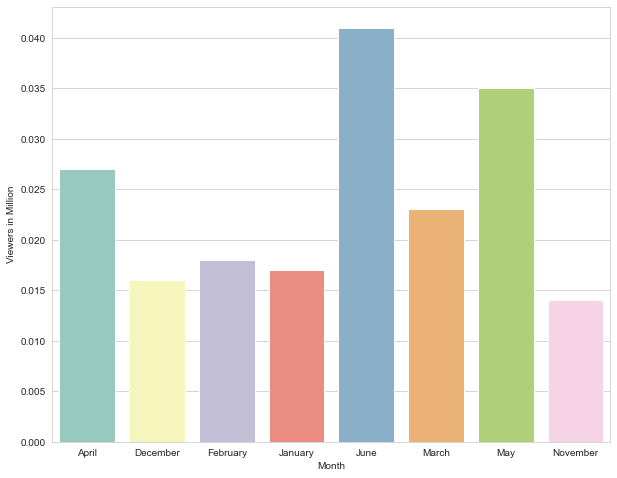

In [154]:
# Data Visualization
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.barplot(data=month_views, x='trending_month_name',y='views_diff',palette='Set3')
plt.title('')
plt.xlabel('Month')
plt.ylabel('Viewers in Million')
plt.savefig('4(3).png')
plt.show()

#### INSIGHT
Barplot tersebut menunjukan penambahan penonton. Penambahan penonton paling banyak terjadi pada bulan Mei dan penambahan penonton paling rendah terjadi pada bulan November.

In [155]:
# Melihat Rata-Rata Penambahan Penonton Kategori Video Berdasarkan Bulan
category_views_month=df1.pivot_table(values='views_diff',index='category',columns='trending_month_name',aggfunc='median')
category_views_month.fillna(0,inplace=True)
category_views_month

trending_month_name,April,December,February,January,June,March,May,November
category,,,,,,,,
Autos & Vehicles,0.0065,0.0100,0.0220,0.0020,0.0000,0.0055,0.0100,0.0270
Comedy,0.0260,0.0200,0.0150,0.0390,0.0185,0.0320,0.0260,0.0230
Education,0.0100,0.0105,0.0100,0.0140,0.0105,0.0100,0.0190,0.0115
Entertainment,0.0280,0.0150,0.0150,0.0160,0.0280,0.0230,0.0310,0.0130
Film & Animation,0.0230,0.0175,0.0390,0.0260,0.0610,0.0380,0.0655,0.0170
Gaming,0.0435,0.0160,0.0060,0.0350,0.0470,0.0225,0.0475,0.0105
Howto & Style,0.0140,0.0105,0.0130,0.0150,0.0180,0.0115,0.0175,0.0110
Music,0.2280,0.0425,0.0750,0.0690,0.1700,0.0990,0.3160,0.0340
News & Politics,0.0090,0.0020,0.0030,0.0020,0.0100,0.0070,0.0130,0.0010


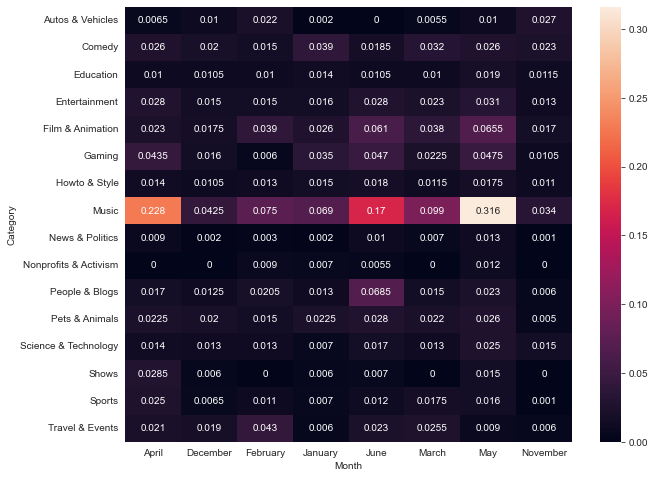

In [156]:
# Data Visualization
plt.figure(figsize=(10,8))
sns.heatmap(category_views_month, annot=True,fmt='g')
plt.xlabel('Month')
plt.ylabel('Category')
plt.savefig('4(4).png')
plt.show()

#### INSIGHT
Heatmap tersebut menunjukan rata-rata penambahan penonton kategori video berdasarkan bulan. Kategori video Music memiliki penambahan penonton paling besar pada periode bulan April-Juni, terutama pada bulan Mei. Selain video kategori Music, pada bulan Juni, video kategori Film & Animation, People & Blogs, dan Gaming memiliki penambahan penonton yang besar.

#### ANALYTICS
* Berdasarkan hari, Minggu merupakan hari dengan penambahan penonton terbanyak. Hal tersebut dapat disebabkan keberadaannya diakhir pekan dan hari libur, sehingga banyak orang yang memilih meluangkan waktunya untuk menonton melalui aplikasi YouTube, terutama. Sementara pada waktu hari kerja, Rabu dan Senin memiliki penambahan jumlah penonton yang paling besar. Selain itu pada akhir pekan, selain Music, kategori video yang memiliki penambahan jumlah penonton yang besar adalah kategori video Gaming dan Film & Animation. Hal tersebut menunjukan adanya preferensi untuk menonton kedua kategori video tersebut diakhir pekan.
* Berdasarkan bulan, periode pasca musim dingin terutama bulan Juni menjadi periode dengan penambahan penonton terbanyak, terutama pada kategori video Music, Gaming, People & Blogs dan Film & Animation. Hal ini dapat disebabkan oleh pencarian informasi atau ide untuk mengisi waktu luang di musim panas atau persiapan musim panas.

### 4. How Quickly Can a Video Get Trending
Melihat jangka waktu yang dibutuhkan sebuah untuk masuk kedalam trending dari waktu mengunggah video.

In [64]:
df2.head() # menggunakan df2

,video_id,trending_date,first_trending_date,first_publish_time,title,channel_title,tags,views,likes,dislikes,...,video_error_or_removed,description,category,engagement_ratio,trending_count,trending_day_name,trending_month_name,views_million,views_diff,trending_video_age
0,-0CMnp02rNY,2018-06-11 23:59:59,2018-06-06 23:59:59,2018-06-04 13:00:00,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,"ellen|""ellen degeneres""|""the ellen show""|""elle...",800359,9773,332,...,False,Ocean's 8 star Mindy Kaling dished on bringing...,Entertainment,1.315410,6,Monday,June,0.800,0.007,2
1,-0NYY8cqdiQ,2018-02-01 23:59:59,2018-02-01 23:59:59,2018-01-29 14:00:39,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,"megan mullally|""megan""|""mullally""|""will and gr...",563746,4429,54,...,False,Ellen and Megan Mullally have known each other...,Entertainment,0.811890,1,Thursday,February,0.564,0.000,3
2,-1Hm41N0dUs,2018-05-01 23:59:59,2018-04-29 23:59:59,2018-04-27 07:30:02,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",2058516,41248,580,...,False,"Benedict Cumberbatch, Don Cheadle, Elizabeth O...",Comedy,2.104040,3,Tuesday,May,2.059,0.177,2
3,-1yT-K3c6YI,2017-12-02 23:59:59,2017-11-29 23:59:59,2017-11-28 18:30:43,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",231341,7734,212,...,False,Check out the video we did on the Merrell Twin...,People & Blogs,3.800450,4,Saturday,December,0.231,0.013,1
4,-2RVw2_QyxQ,2017-11-16 23:59:59,2017-11-14 23:59:59,2017-11-12 02:39:01,2017 Champions Showdown: Day 3,Saint Louis Chess Club,"Chess|""Saint Louis""|""Club""",71089,460,27,...,False,The Saint Louis Chess Club hosts a series of f...,Education,0.713191,3,Thursday,November,0.071,0.001,2


In [128]:
# Infotable
df2['trending_video_age'].describe()

count    6353.000000
mean       22.520856
std       209.930602
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      4215.000000
Name: trending_video_age, dtype: float64

#### INSIGHT
75% video yang masuk trending memiliki umur dibawah 3 hari.

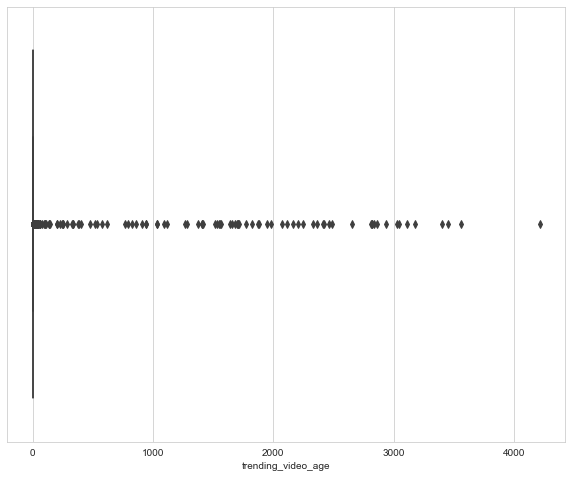

In [66]:
# Melihat Distribusi Data Kolom 'trending_video_age'
plt.figure(figsize=(10,8))
sns.boxplot(data=df2, x='trending_video_age')
plt.show()

#### INSIGHT
Boxplot menunjukan bahwa distribusi data tidak normal.

In [67]:
# Melihat  Umur Kategori Video yang Masuk Trending
trending_video_age=df2.groupby('category')[['trending_video_age']].median()
trending_video_age.reset_index(inplace=True)
trending_video_age

,category,trending_video_age
0,Autos & Vehicles,2.0
1,Comedy,1.0
2,Education,2.0
3,Entertainment,2.0
4,Film & Animation,2.0
5,Gaming,1.0
6,Howto & Style,2.0
7,Music,1.0
8,News & Politics,1.0
9,Nonprofits & Activism,3.0


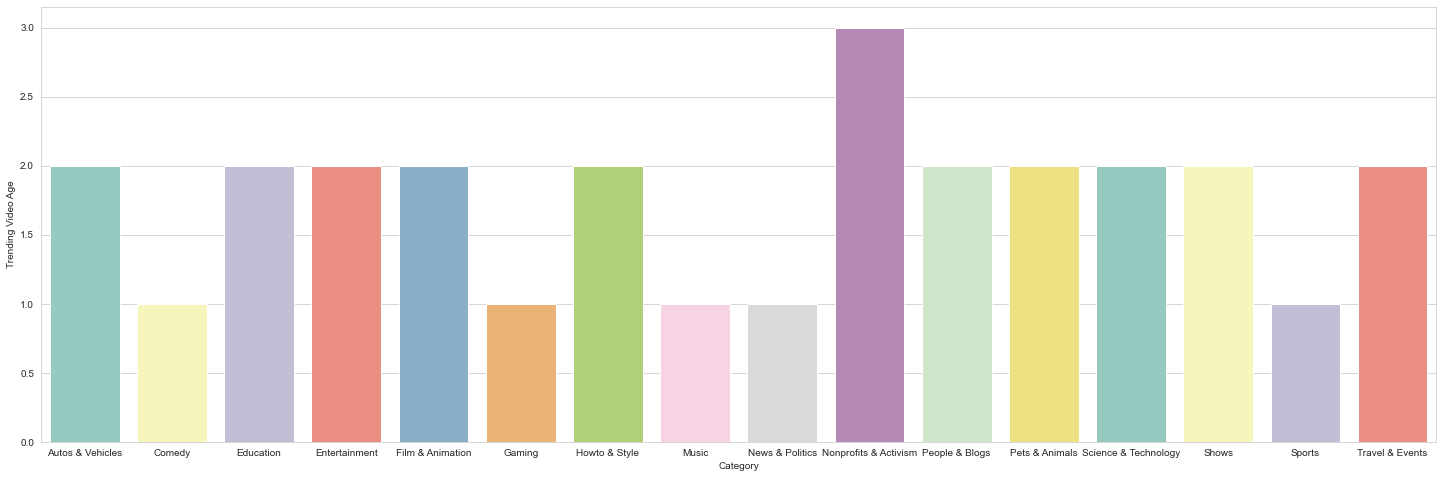

In [68]:
# Data Visualization
plt.figure(figsize=(25,8))
sns.set_style('whitegrid')
sns.barplot(data=trending_video_age,x='category',y='trending_video_age',palette='Set3')
plt.xlabel('Category')
plt.ylabel('Trending Video Age')
plt.savefig('5.png')
plt.show()

#### INSIGHT
Barplot tersebut menunjukan umur kategori video saat masuk kedalam trending. Kategori video Comedy, Gaming, Music, News & Politics, dan Sports merupakan kategori video yang paling cepat masuk kedalam trending.

#### ANALYTICS
* Video yang masuk kedalam trending memiliki umur video pada rentang  kurang dari 1 hari hingga lebih dari 10 tahun (4215 hari) dari saat pertama kali diunggah dengan sekitar 75% dari video memiliki umur video kurang dari 3 hari dari saat pertama kali diunggah. Dapat diartikan bahwa sebagian besar video dapat masuk trending dalam hitungan hari dari waktu mengunggah video.
* Kategori video Comedy, Gaming, Music, News & Politics, dan Sport menjadi kategori video dengan jangka waktu paling cepat untuk masuk kedalam trending. Hal tersebut dapat disebakan oleh jenis video tersebut yang merupakan cuplikan dari tayangan langsung sehingga dapat dengan cepat mendapatkan penonton dan interaksi dari pengguna YouTube.

### 5. Which Category is More Likely to Get Trending?
Melihat kategori mana yang paling banyak masuk kedalam trending pada periode waktu 14 November 2017-14 Juni 2017. Hal tersebut dapat menggambarkan peluang sebuah kategori video untuk masuk kedalam trending.

In [48]:
# Melihat Kategori Video yang Paling Banyak Masuk Trending
category=df1.groupby('category')[['video_id']].count()
category.reset_index(inplace=True)
category

,category,video_id
0,Autos & Vehicles,384
1,Comedy,3457
2,Education,1656
3,Entertainment,9954
4,Film & Animation,2344
5,Gaming,817
6,Howto & Style,4143
7,Music,6470
8,News & Politics,2485
9,Nonprofits & Activism,57


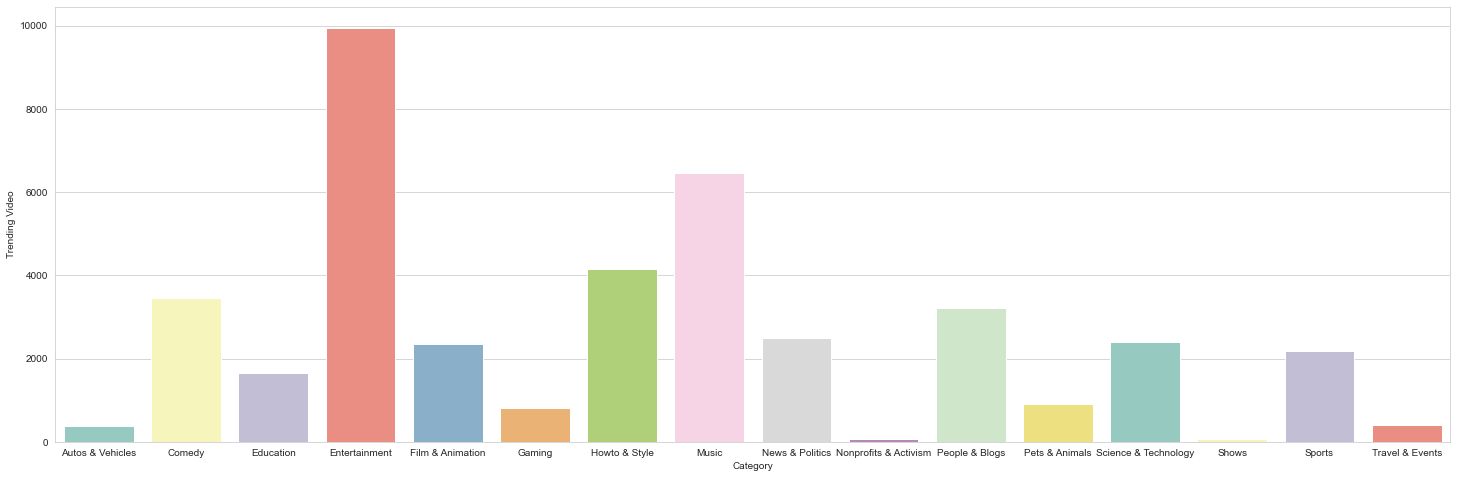

In [49]:
# Data Visualization
plt.figure(figsize=(25,8))
sns.set_style('whitegrid')
sns.barplot(data=category,x='category',y='video_id',palette='Set3')
plt.xlabel('Category')
plt.ylabel('Trending Video')
plt.savefig('3.png')
plt.show()

#### INSIGHT
Barplot tersebut menunjukan kategori video yang paling sering berada didalam trending. Video dengan kategori Entertainment merupakan kategori video yang paling banyak berada didalam trending.

In [125]:
# Melihat Hari Kategori Video Masuk Trending
category_day=df1.pivot_table(values='video_id',index='category',columns='trending_day_name',aggfunc='count')
category_day.fillna(0,inplace=True)
category_day

trending_day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
category,,,,,,,
Autos & Vehicles,58,55,58,53,52,57,51
Comedy,503,483,512,484,493,498,484
Education,244,233,247,232,234,240,226
Entertainment,1419,1420,1446,1392,1415,1447,1415
Film & Animation,336,338,341,333,339,337,320
Gaming,107,113,110,110,129,122,126
Howto & Style,596,587,604,597,570,601,588
Music,850,914,976,942,896,959,933
News & Politics,357,339,366,356,355,358,354


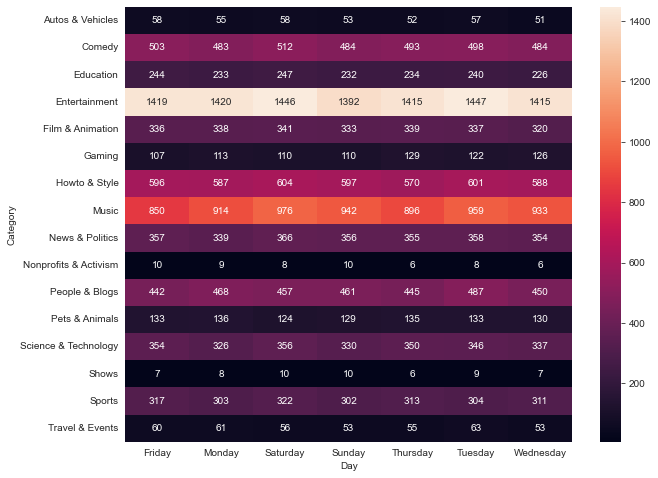

In [126]:
# Data Visualization
plt.figure(figsize=(10,8))
sns.heatmap(category_day, annot=True,fmt='g')
plt.xlabel('Day')
plt.ylabel('Category')
plt.savefig('3(1).png')
plt.show()

#### INSIGHT
Heatmap tersebut menunjukan hari kategori video masuk kedalam trending. Kategori video Entertainment dan Music menjadi kategori video yang paling banyak masuk trending setiap harinya.

In [52]:
# Melihat Bulan Kategori Video Masuk Trending
category_month=df1.pivot_table(values='video_id',index='category',columns='trending_month_name',aggfunc='count')
category_month.fillna(0,inplace=True)
category_month

trending_month_name,April,December,February,January,June,March,May,November
category,,,,,,,,
Autos & Vehicles,34.0,58.0,129.0,91.0,0.0,16.0,9.0,47.0
Comedy,407.0,579.0,423.0,465.0,234.0,524.0,510.0,315.0
Education,204.0,224.0,235.0,254.0,66.0,328.0,207.0,138.0
Entertainment,1160.0,1549.0,1243.0,1288.0,696.0,1537.0,1691.0,790.0
Film & Animation,264.0,360.0,295.0,354.0,206.0,337.0,354.0,174.0
Gaming,92.0,63.0,75.0,112.0,151.0,122.0,180.0,22.0
Howto & Style,557.0,560.0,479.0,551.0,253.0,810.0,614.0,319.0
Music,747.0,950.0,777.0,758.0,696.0,810.0,1119.0,613.0
News & Politics,164.0,547.0,521.0,500.0,63.0,195.0,274.0,221.0


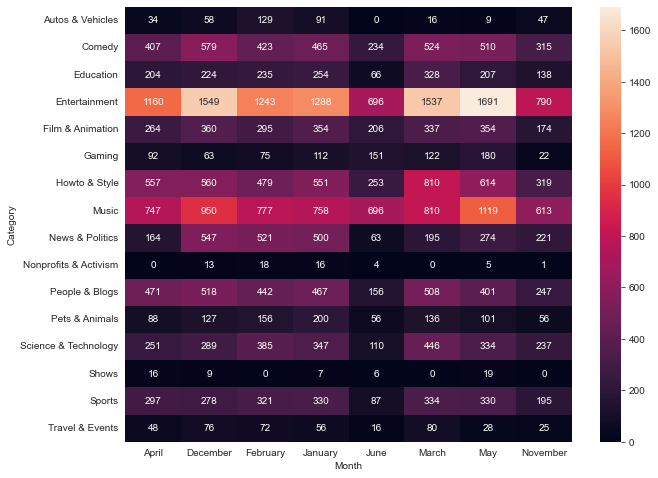

In [53]:
# Data Visualization
plt.figure(figsize=(10,8))
sns.heatmap(category_month, annot=True,fmt='g')
plt.xlabel('Month')
plt.ylabel('Category')
plt.savefig('3(2).png')
plt.show()

#### INSIGHT
Heatmap tersebut menunjukan bulan kategori video masuk kedalam trending. Kategori video Entertainment menjadi kategori video yang paling banyak masuk trending setiap bulannnya, terutama pada hari Mei. Pada periode bulan Desember-Februari, selain video kategori Entertainment, kategori video Howto & Style, Music, Comedy, People & Blogs dan News & Politics menjadi kategori video yang masuk trending dengan jumlah cukup besar.

#### ANALYTICS
* Kategori video Entertainment, Music, Howto & Style, Comedy, dan People & Blogs menjadi 5 kategori video yang paling sering berada didalam trending setiap harinya. Hal tersebut dapat menunjukan bahwa kelima kategori video tersebut merupakan kategori video yang populer di US
* Pada periode musim dingin (Desember-Februari), selain video kategori Entertainment, kategori video Howto & Style, Music, Comedy, People & Blogs dan News & Politics menjadi kategori video yang berada didalam trending dengan jumlah yang besar. Hal tersebut dapat disebabkan oleh banyak acara besar hingga hari penting yang ada pada periode waktu tersebut.

## Summary

1. Walaupun memiliki jumlah penonton yang belum mencapai 1 juta, sebuah video memiliki peluang yang besar untuk masuk kedalam trending.
2. Salah satu hal yang perlu diperhatikan untuk masuk kedalam trending dengan adanya interaksi atau tingkat Engagement Ratio.
3. Berdasarkan hari, Minggu merupakan hari terbaik untuk mendapatkan penambahan penonton sedangkan berdasarkan bulan, periode pasca musim dingin terutama bulan Juni merupakan bulan terbaik untuk mendapatkan penambahan penonton.
4. Sebagian besar video dapat masuk kedalam trending dalam jangka waktu 3 hari dari hari video tersebut diunggah.
5. Kategori video yang mempunyai peluang paling besar untuk masuk kedalam trending adalah Entertainment dan Music.

## Recommendation

1. Membuat video dengan konten yang dapat menarik banyak orang. Membuat video dengan konten yang untuk atau bentuk yang berbeda seperti series dan mempromosikan video pada sosial media lainnya untuk menarik perhatian banya orang.
2. Melibatkan  penonton untuk berinteraksi dalam unggahan  video. Mengajak penonton untuk bersuara pada unggahan video atau meninggalkan pernyataan/pertanyaan untuk memancing interaksi dan respon penonton didalam unggahan.
3. Memperhatikan waktu mengunggah video dengan waktu penambahan penonton. Hal ini disebabkan jangka waktu masuk trending yang cepat (dalam hitungan hari), sehingga perlu memperhatikan kapan video waktu yg tepat untuk menggunggah dan mendapatkan penambahan penonton, sehingga dapat berjalan lebih efektif.
4. Memperhatikan kategori video berdasarkan periode waktu yang tepat. Menyusaikan kategori video yang akan diunggah pada periode waktu yang tepat, sehingga kemungkinan untuk masuk kedalam trending dapat meningkat.